<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-Means Clustering with Seeds Data

_Authors: Joseph Nelson (DC), Haley Boyan (DC), Sam Stack (DC)_

---

In [2]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

### 1. Import the data

In [3]:
seeds = pd.read_csv("../../data/seeds.csv")

### 2. Do some EDA of relationships between features.

In [4]:
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
plt.rcParams['figure.figsize'] = [15,15]

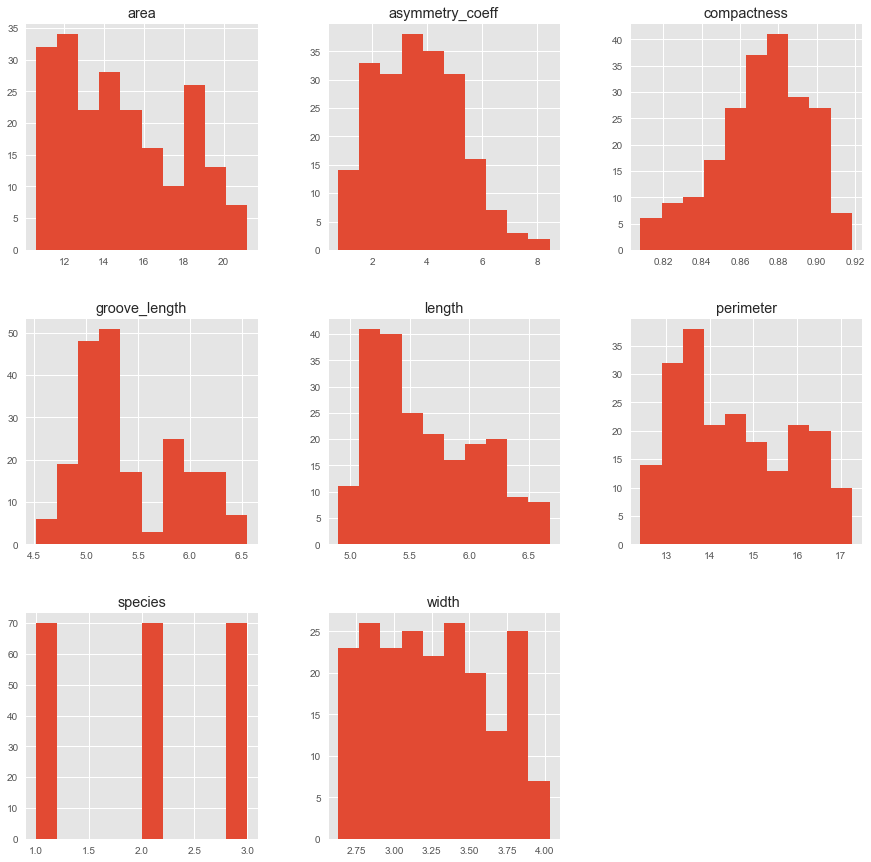

In [6]:
# Plot the Data to see the distributions/relationships

seeds.hist()
plt.show()

In [7]:
# Check for nulls
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
area               210 non-null float64
perimeter          210 non-null float64
compactness        210 non-null float64
length             210 non-null float64
width              210 non-null float64
asymmetry_coeff    210 non-null float64
groove_length      210 non-null float64
species            210 non-null int64
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [8]:
# Look at the real species labels.
seeds.species.value_counts()

3    70
2    70
1    70
Name: species, dtype: int64

Remember, clustering is a unsupervised learning method so known classes will never be a thing.  In this situation we can see that the `perimiter` vs. `groove_length` is a good visualization to view the proper classes class, and we can use later to compare the results of clustering to a true value.

### 3. Prepare the data for clustering

1. Remove the `species` column. We will see if the clusters from K-Means end up like the actual species.
2. Put the features on the same scale.

In [9]:
# A:
species = seeds.species
X = seeds.drop('species', axis=1)
X.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


### 4. Clustering with K-Means

- Cluster the data to our our target groups.
- We know that there are 3 actual classes. However, in an actual situation in which we used clustering we would have no idea. Lets initally try using the default K for `KMeans`(8).

In [10]:
from sklearn.cluster import KMeans


In [11]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

### 5. Get the labels and centroids for out first clustering model.

In [12]:
# A:
kmeans.labels_

array([7, 7, 2, 2, 7, 2, 2, 2, 7, 7, 1, 2, 2, 2, 2, 2, 3, 7, 7, 6, 2, 2,
       7, 6, 7, 7, 6, 6, 2, 2, 6, 1, 2, 2, 7, 7, 7, 1, 2, 3, 2, 2, 6, 1,
       2, 2, 7, 2, 2, 7, 2, 1, 2, 2, 7, 7, 2, 7, 7, 6, 6, 6, 6, 2, 6, 6,
       7, 2, 7, 6, 1, 1, 1, 5, 1, 1, 1, 4, 4, 1, 1, 4, 4, 5, 5, 5, 5, 5,
       4, 4, 5, 5, 5, 4, 4, 1, 5, 5, 5, 5, 1, 5, 4, 5, 5, 5, 5, 1, 5, 5,
       5, 5, 5, 4, 4, 5, 4, 5, 5, 5, 4, 5, 1, 5, 1, 4, 4, 5, 5, 1, 5, 5,
       1, 1, 1, 2, 1, 7, 7, 1, 3, 3, 3, 0, 0, 0, 6, 0, 6, 0, 0, 3, 0, 6,
       0, 0, 6, 0, 0, 0, 6, 0, 0, 0, 0, 6, 0, 6, 0, 6, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 6, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 6, 0, 0, 0, 3, 3,
       6, 6, 3, 6, 0, 3, 6, 6, 0, 3, 6, 3], dtype=int32)

In [13]:
seeds['cluster'] = kmeans.labels_
seeds.sort_values('cluster')

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species,cluster
150,11.83,13.23,0.8496,5.263,2.840,5.1950,5.307,3,0
189,10.59,12.41,0.8648,4.899,2.787,4.9750,4.794,3,0
163,12.55,13.57,0.8558,5.333,2.968,4.4190,5.176,3,0
144,11.82,13.40,0.8274,5.314,2.777,4.4710,5.178,3,0
143,12.22,13.32,0.8652,5.224,2.967,5.4690,5.221,3,0
172,11.27,12.97,0.8419,5.088,2.763,4.3090,5.000,3,0
187,10.91,12.80,0.8372,5.088,2.675,4.1790,4.956,3,0
186,11.81,13.45,0.8198,5.413,2.716,4.8980,5.352,3,0
185,11.56,13.31,0.8198,5.363,2.683,4.0620,5.182,3,0
164,11.14,12.79,0.8558,5.011,2.794,6.3880,5.049,3,0


### 6. Compute the silouette score and visually examine the results of the 8 clusters. 

_(pairplot with hue)_

In [14]:
from sklearn.metrics import silhouette_score

# A:
silhouette_score(X, labels=kmeans.labels_, random_state=42)

0.3597918645932829

In [15]:
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'black', 'grey'])

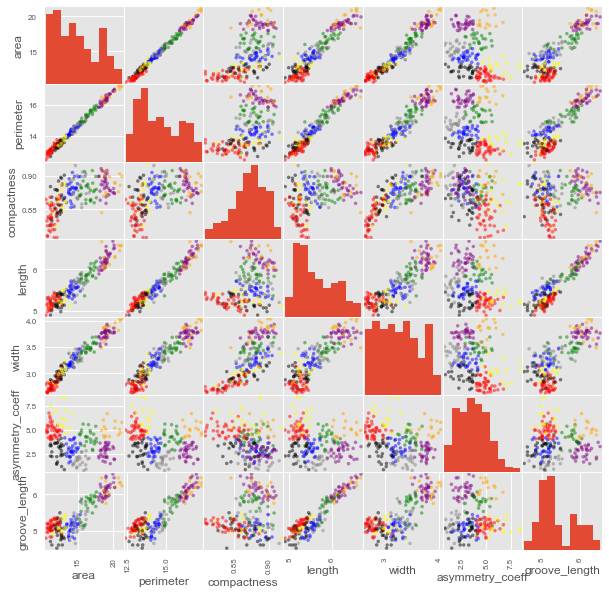

In [16]:
pd.plotting.scatter_matrix(X, c=colors[seeds.cluster], figsize=[10,10])
plt.rcParams['figure.figsize'] = [20,30]
plt.show()

### 7. Repeat steps #4 and #6 with two selected or random K values and compare the results to the k=8 model.

In [17]:
k1, k2 = np.random.randint(1,25), np.random.randint(1,25)

In [18]:
# A:
kmeans = KMeans(n_clusters=k1, random_state=42)
kmeans.fit(X)
seeds['cluster1'] = kmeans.labels_
seeds.sort_values('cluster1')

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species,cluster,cluster1
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220,1,7,0
32,14.09,14.41,0.8529,5.717,3.186,3.9200,5.299,1,2,0
33,13.94,14.17,0.8728,5.585,3.150,2.1240,5.012,1,2,0
34,15.05,14.68,0.8779,5.712,3.328,2.1290,5.360,1,7,0
35,16.12,15.00,0.9000,5.709,3.485,2.2700,5.443,1,7,0
38,14.80,14.52,0.8823,5.656,3.288,3.1120,5.309,1,2,0
40,13.54,13.85,0.8871,5.348,3.156,2.5870,5.178,1,2,0
41,13.50,13.85,0.8852,5.351,3.158,2.2490,5.176,1,2,0
137,15.57,15.15,0.8527,5.920,3.231,2.6400,5.879,2,7,0
45,13.80,14.04,0.8794,5.376,3.155,1.5600,4.961,1,2,0


In [19]:
silhouette_score(X, labels=kmeans.labels_, random_state=42)

0.3613234083219361

In [20]:
kmeans = KMeans(n_clusters=k2, random_state=42)
kmeans.fit(X)
seeds['cluster2'] = kmeans.labels_
seeds.sort_values('cluster2')

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species,cluster,cluster1,cluster2
129,17.55,15.66,0.8991,5.791,3.690,5.3660,5.661,2,1,3,0
125,18.75,16.18,0.8999,6.111,3.869,4.1880,5.992,2,4,2,0
126,18.65,16.41,0.8698,6.285,3.594,4.3910,6.102,2,4,2,0
107,17.63,15.86,0.8800,6.033,3.573,3.7470,5.929,2,1,3,0
121,18.14,16.12,0.8772,6.059,3.563,3.6190,6.011,2,5,2,0
70,17.63,15.98,0.8673,6.191,3.561,4.0760,6.060,2,1,3,0
72,17.26,15.73,0.8763,5.978,3.594,4.5390,5.791,2,1,3,0
116,18.96,16.20,0.9077,6.051,3.897,4.3340,5.750,2,4,2,0
76,17.32,15.91,0.8599,6.064,3.403,3.8240,5.922,2,1,3,0
79,17.12,15.55,0.8892,5.850,3.566,2.8580,5.746,2,1,3,0


In [21]:
silhouette_score(X, labels=kmeans.labels_, random_state=42)

0.3252826417768789

In [22]:
print(k1, k2)

5 10


# 8. Build a function to find the optimal number of clusters using silhouette score as the criteria.
1. Function should accept a range and a dataframe as arguments
2. Returns the optimal K value, associate silhoutte and scaling method.
3. Your function should also consider the scaled results of the data. 
    - `normalize`, `StandardScaler`, `MinMaxScaler`


Once you have found the optimal K and version of the data, visualize the clusters.





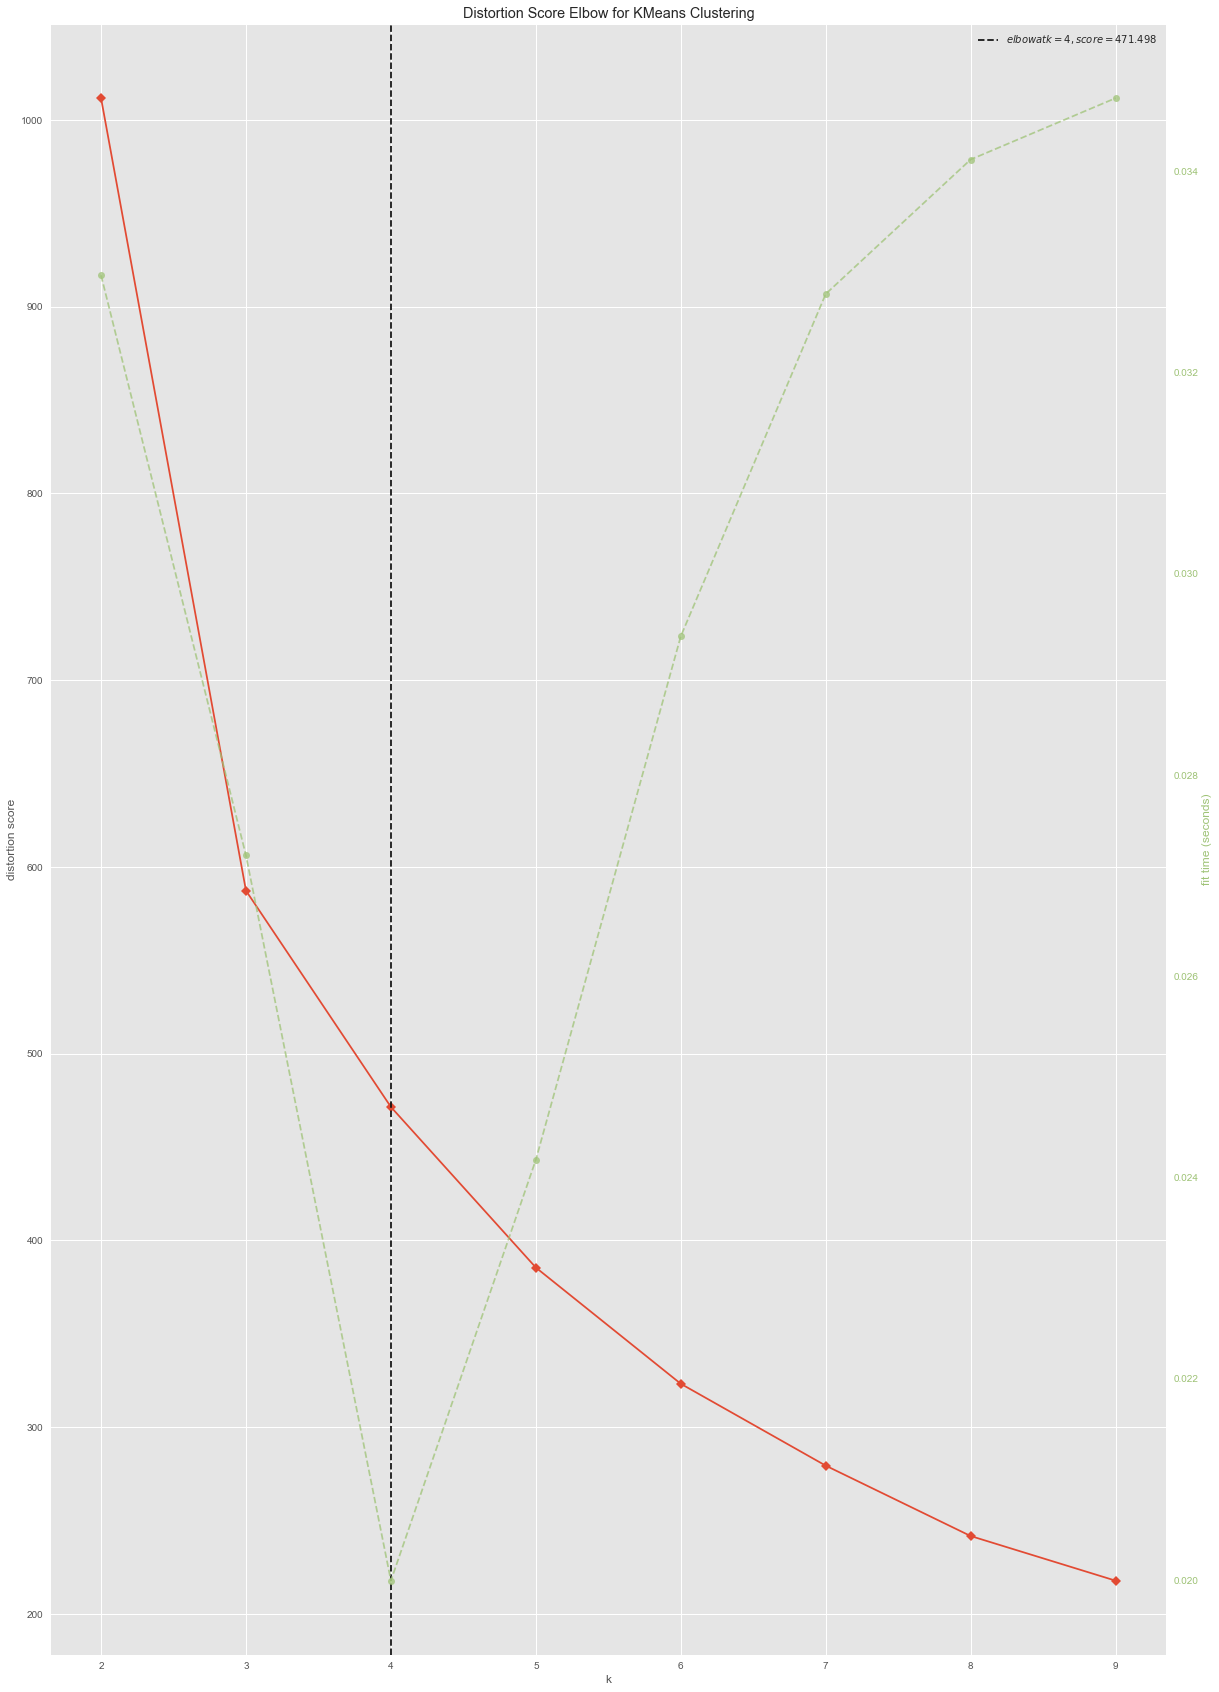

In [24]:
# A: This function already exists. God Bless Python.
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans, k=(2,10))

visualizer.fit(X)
visualizer.show();